In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read file
attrition_data = pd.read_csv("Employee Attrition for Healthcare/watson_healthcare_modified.csv")

In [3]:
# Preview dataframe
attrition_data.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Number of observations
len(attrition_data)

1676

## Attrition in Registered Nursing Workforce

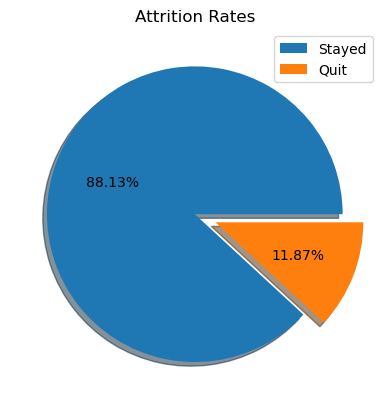

In [5]:
# Attrition Rates
yesNo = pd.DataFrame(attrition_data.groupby("Attrition")["EmployeeID"].count())
attritionRates = yesNo.plot(kind="pie", y="EmployeeID", ylabel="", title="Attrition Rates", labeldistance=None, shadow=True, explode=[0,0.15],  autopct="%1.2f%%")
attritionRates.legend(["Stayed", "Quit"])
plt.savefig("Attrition Rates.png")

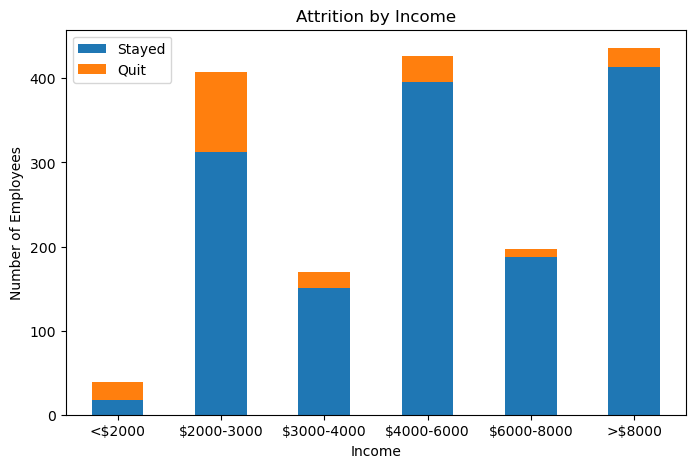

In [6]:
# Income Comparison
incomeBinsAll = [0,2000,3000,4000,6000,8000, 20000]
incomeLabelsAll = ["<$2000", "$2000-3000", "$3000-4000", "$4000-6000", "$6000-8000", ">$8000"]
incComp = attrition_data.copy()
incComp["Income"] = pd.cut(incComp["MonthlyIncome"], incomeBinsAll, labels=incomeLabelsAll)

incComparison = incComp.groupby(["Income", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, ylabel="Number of Employees", title="Attrition by Income", figsize=(8,5), rot=0)
incComparison.legend(["Stayed", "Quit"])
plt.savefig("Attrition by Income Comparison")

In [7]:
# Create and display dataframe of those who quit
attritionYes = attrition_data[attrition_data["Attrition"]=="Yes"].reset_index(drop=True)
attritionYes.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
1,1420391,28,Yes,Travel_Rarely,103,Maternity,24,3,Life Sciences,1,...,2,80,0,6,4,3,4,2,0,3
2,1142062,32,Yes,Travel_Frequently,1125,Maternity,16,1,Life Sciences,1,...,2,80,0,10,5,3,10,2,6,7
3,1884939,24,Yes,Travel_Rarely,813,Maternity,1,3,Medical,1,...,1,80,1,6,2,2,2,0,2,0
4,1058169,50,Yes,Travel_Rarely,869,Cardiology,3,2,Marketing,1,...,3,80,0,3,2,3,3,2,0,2


In [8]:
# Number of observations
len(attritionYes)

199

## Attrition Demographics

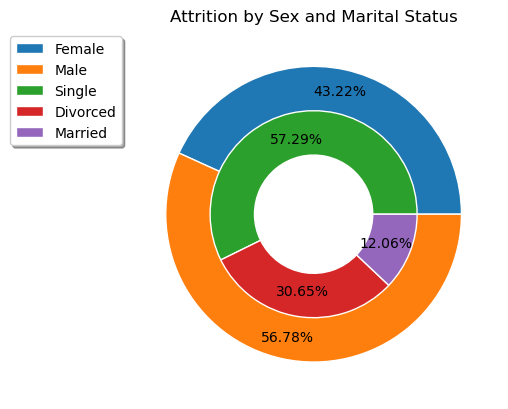

In [9]:
# Attrition by Sex and Marital Status
sex=attritionYes.groupby("Gender")["Attrition"].count()
mStatus=attritionYes["MaritalStatus"].value_counts()
xmLabels=["Female", "Male", "Single", "Divorced", "Married"]

fig, ax = plt.subplots()

plota = ax.pie(sex, 
       radius=1,  
       labels=None, 
       autopct="%1.2f%%",
       pctdistance=0.85,
       wedgeprops=dict(width=0.5, edgecolor='w'))

plotb = ax.pie(mStatus, 
       radius=1-0.3,
       labels=None,
       autopct="%1.2f%%",
       pctdistance=0.75,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.set_title("Attrition by Sex and Marital Status")
ax.legend(plota[0] + plotb[0], xmLabels, bbox_to_anchor=(0,0,0,1), loc="upper right", shadow=True)
plt.savefig("Attrition by Sex and Marital Status")
# Note: this chart will not show overlap of sex and marital status

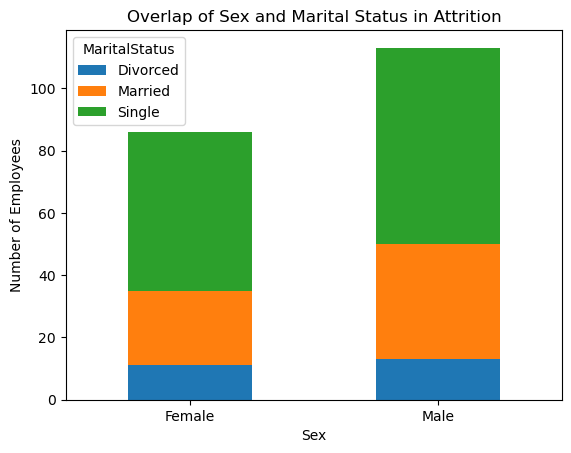

In [10]:
# Overlap of sex and marital status 
smOverlap = attritionYes.groupby(["Gender","MaritalStatus"]).size().unstack().plot(kind='bar', stacked=True, xlabel="Sex", ylabel="Number of Employees", title="Overlap of Sex and Marital Status in Attrition", rot=0)
plt.savefig("Overlap of Sex and Marital Status in Attrition")

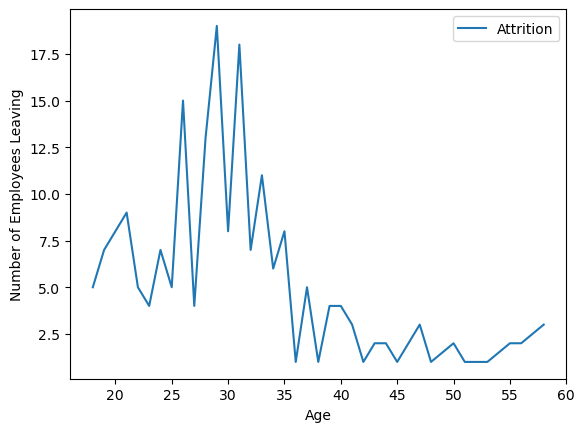

In [11]:
# Attrition by Age
ageYes=pd.DataFrame(attritionYes.groupby("Age")["Attrition"].count())
attritionAge = ageYes.plot(kind="line", ylabel="Number of Employees Leaving")

## Major Factors in Attrition

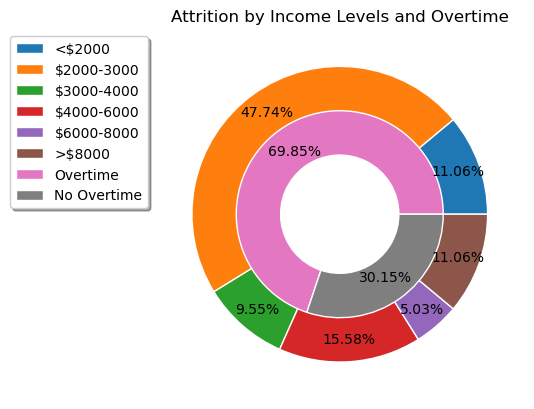

In [12]:
# Attrition by Income Levels & Overtime
# Add bins to add income levels column
incomeBins = [0,2000,3000,4000,6000,8000, 20000]
incomeLabels = ["<$2000", "$2000-3000", "$3000-4000", "$4000-6000", "$6000-8000", ">$8000"]
attritionYes["Income"] = pd.cut(attritionYes["MonthlyIncome"], incomeBins, labels=incomeLabels)

# Nested pie char
incomeYes=attritionYes.groupby("Income")["Attrition"].count()
overtime=attritionYes["OverTime"].value_counts()
iOLabels = ["<$2000", "$2000-3000", "$3000-4000", "$4000-6000", "$6000-8000", ">$8000","Overtime", "No Overtime"]
fig, ax = plt.subplots()

plot1 = ax.pie(incomeYes, 
       radius=1,  
       labels=None, 
       autopct="%1.2f%%",
       pctdistance=0.85,
       wedgeprops=dict(width=0.5, edgecolor='w')) # makes it a donut

plot2 = ax.pie(overtime, 
       radius=1-0.3,
       labels=None,
       autopct="%1.2f%%",
       pctdistance=0.75,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.set_title("Attrition by Income Levels and Overtime")
ax.legend(plot1[0] + plot2[0], iOLabels, bbox_to_anchor=(0,0,0,1), loc="upper right", shadow=True)
plt.savefig("Attrition by Income Levels and Overtime")
# Note: this chart does not show an overlap between income levels and overtime

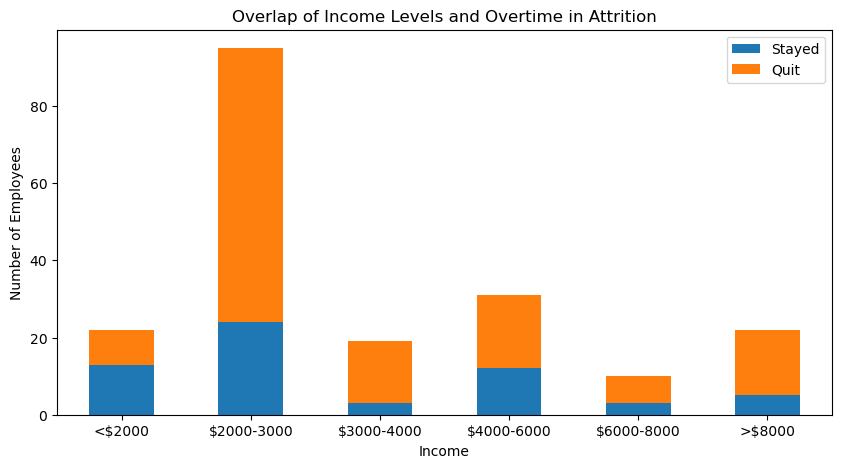

In [13]:
# Overlap of income levels and overtime 
ioOverlap = attritionYes.groupby(["Income", "OverTime"]).size().unstack().plot(kind='bar', stacked=True, ylabel="Number of Employees", title="Overlap of Income Levels and Overtime in Attrition" , figsize=(10,5), rot=0)
ioOverlap.legend(["Stayed", "Quit"])
plt.savefig("Overlap of Income Levels and Overtime in Attrition")

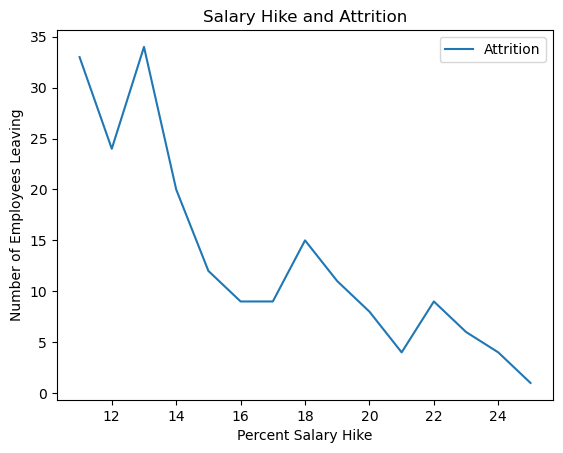

In [14]:
# Attrition by Percent Salary Hike
salaryHikeYes=pd.DataFrame(attritionYes.groupby("PercentSalaryHike")["Attrition"].count())
attritionSHike = salaryHikeYes.plot(kind="line", xlabel="Percent Salary Hike", ylabel="Number of Employees Leaving", title="Salary Hike and Attrition")
plt.savefig("Salary Hike and Attrition.png")

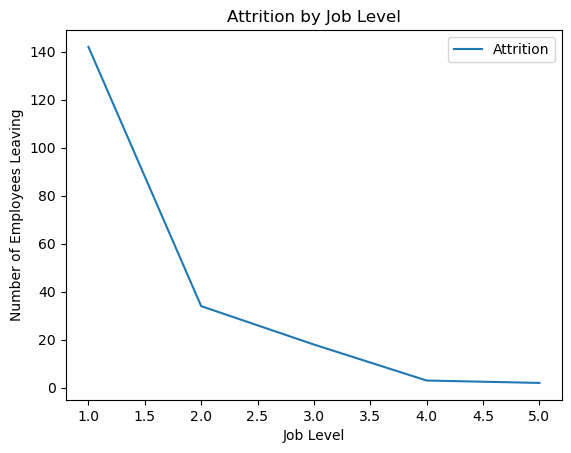

In [15]:
# Attrition by Job Level
jLevelYes=pd.DataFrame(attritionYes.groupby("JobLevel")["Attrition"].count())
jLevel = jLevelYes.plot(kind="line", xlabel="Job Level", ylabel="Number of Employees Leaving", title="Attrition by Job Level")
plt.savefig("Attrition by Job Level.png")

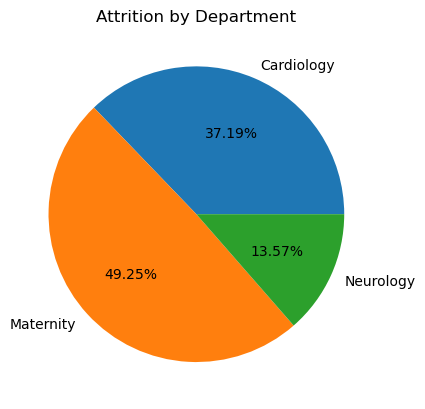

In [16]:
# Attrition by Department(Left)
departmentYes=pd.DataFrame(attritionYes.groupby("Department")["Attrition"].count())
attritionDept = departmentYes.plot(kind="pie", y="Attrition", ylabel="", title="Attrition by Department", autopct="%1.2f%%", legend=None)

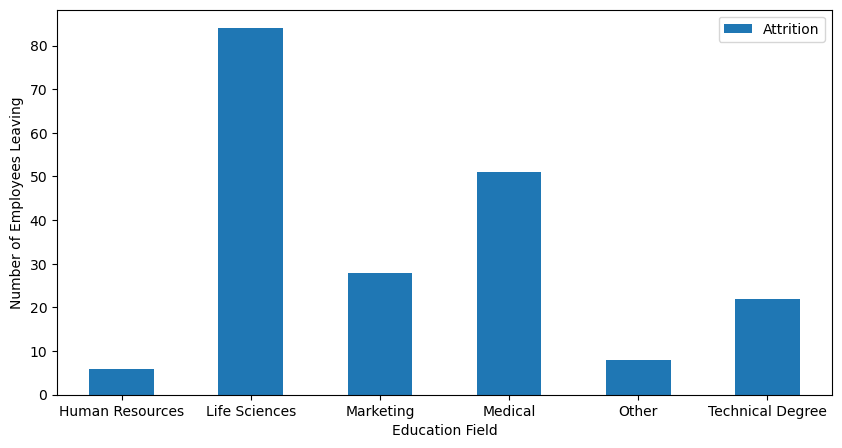

In [17]:
# Attrition by Education Field
eduYes=pd.DataFrame(attritionYes.groupby("EducationField")["Attrition"].count())
attritionEdu = eduYes.plot(kind="bar", xlabel="Education Field", ylabel="Number of Employees Leaving", figsize=(10,5), rot=0)

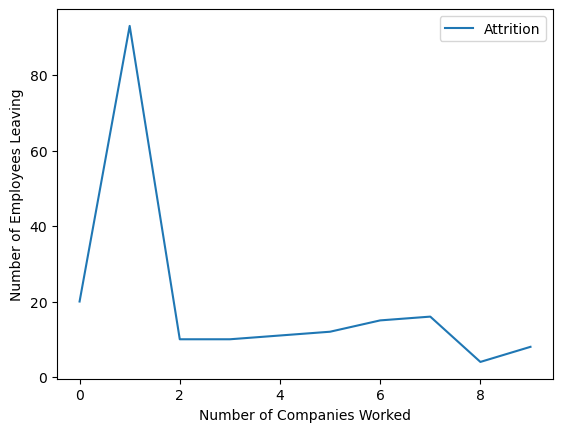

In [18]:
# Attrition by Number of Companies Worked
companiesYes=pd.DataFrame(attritionYes.groupby("NumCompaniesWorked")["Attrition"].count())
attritionPastComps = companiesYes.plot(kind="line", xlabel="Number of Companies Worked", ylabel="Number of Employees Leaving")

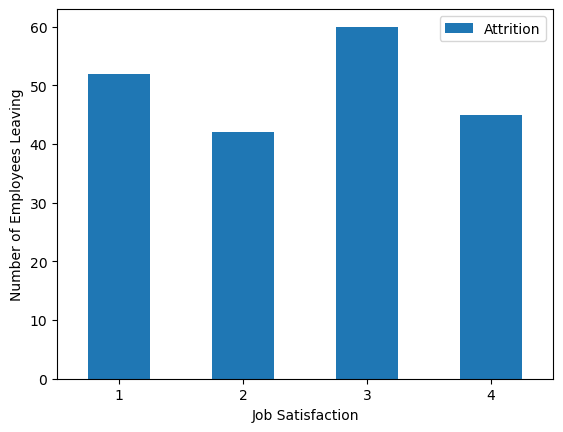

In [19]:
# Attrition by Job Satisfaction
jobYes=pd.DataFrame(attritionYes.groupby("JobSatisfaction")["Attrition"].count())
jobSat = jobYes.plot(kind="bar", xlabel="Job Satisfaction", ylabel="Number of Employees Leaving", rot=0)

<AxesSubplot:xlabel='Business Travel', ylabel='Number of Employees Leaving'>

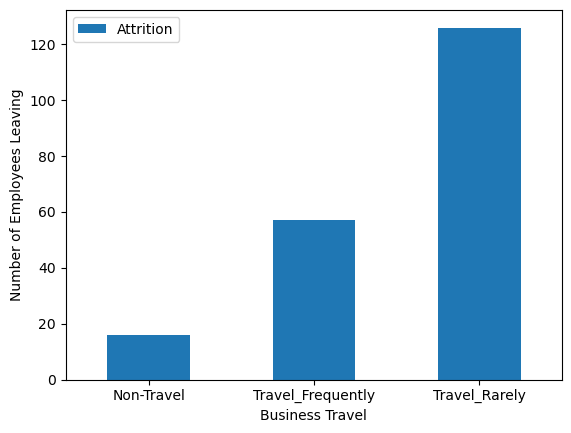

In [20]:
# Attrition by Business Travel
travelYes=pd.DataFrame(attritionYes.groupby("BusinessTravel")["Attrition"].count())
travelYes.plot(kind="bar", xlabel="Business Travel", ylabel="Number of Employees Leaving",  rot=0)

<AxesSubplot:xlabel='Distance From Home', ylabel='Number of Employees Leaving'>

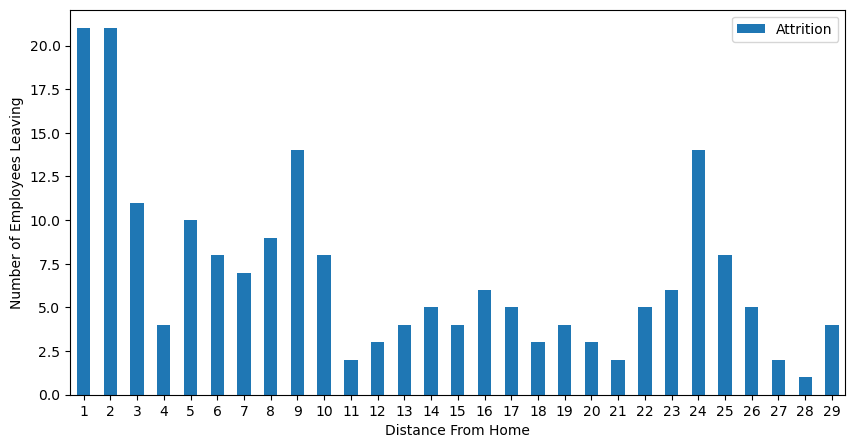

In [21]:
# Attrition by Distance from Home
distanceYes=pd.DataFrame(attritionYes.groupby("DistanceFromHome")["Attrition"].count())
distanceYes.plot(kind="bar", xlabel="Distance From Home", ylabel="Number of Employees Leaving", figsize=(10,5), rot=0)

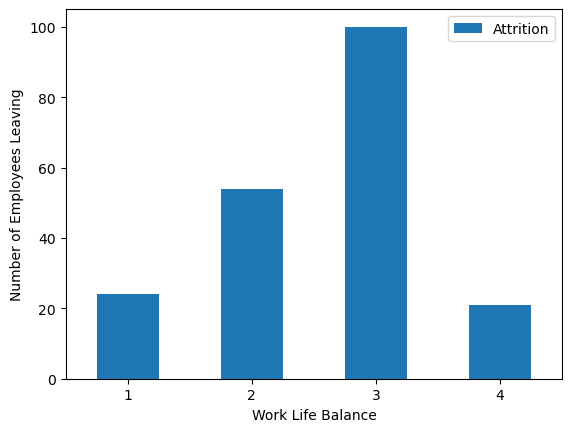

In [22]:
# Attrition by Work Life Balance
wLBYes=pd.DataFrame(attritionYes.groupby("WorkLifeBalance")["Attrition"].count())
attritionWLB = wLBYes.plot(kind="bar", xlabel="Work Life Balance", ylabel="Number of Employees Leaving", rot=0)

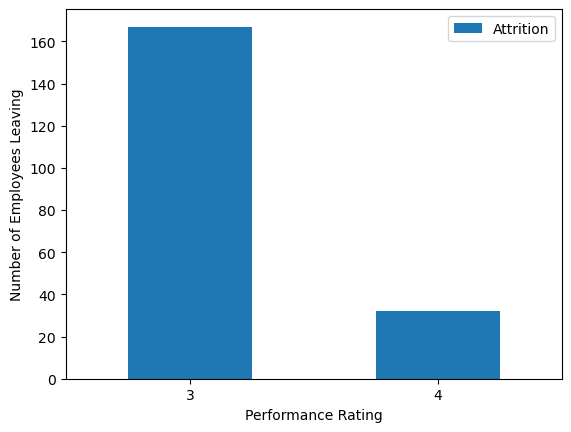

In [23]:
# Attrition by Performance Rating - Not compelling
performanceYes=pd.DataFrame(attritionYes.groupby("PerformanceRating")["Attrition"].count())
attritionPerf = performanceYes.plot(kind="bar", xlabel="Performance Rating", ylabel="Number of Employees Leaving", rot=0)

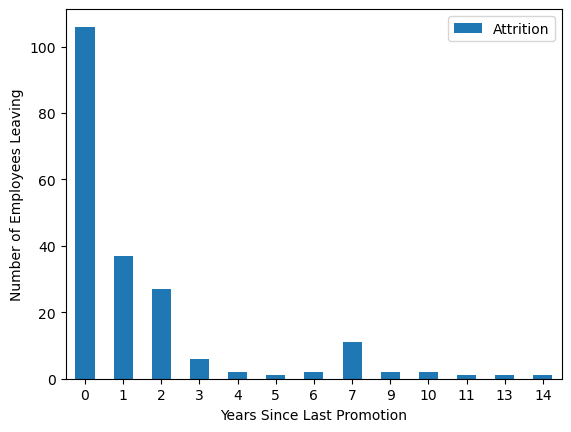

In [24]:
# Attrition by Years Since Last Promotion
promotionYes=pd.DataFrame(attritionYes.groupby("YearsSinceLastPromotion")["Attrition"].count())
attritionProm = promotionYes.plot(kind="bar", xlabel="Years Since Last Promotion", ylabel="Number of Employees Leaving", rot=0)

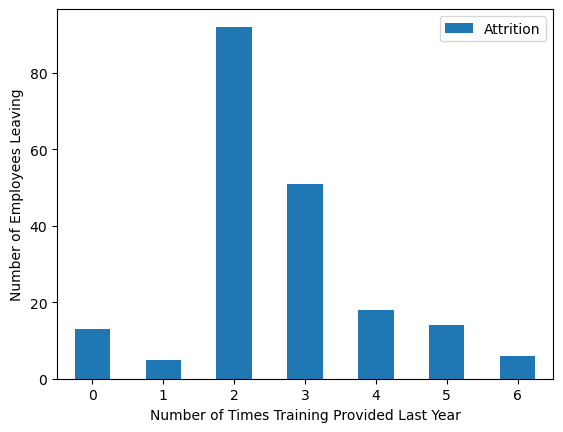

In [25]:
# Attrition by Training Times Last Year
trainingYes=pd.DataFrame(attritionYes.groupby("TrainingTimesLastYear")["Attrition"].count())
attritionTraining = trainingYes.plot(kind="bar", xlabel="Number of Times Training Provided Last Year", ylabel="Number of Employees Leaving", rot=0)

## Tenure

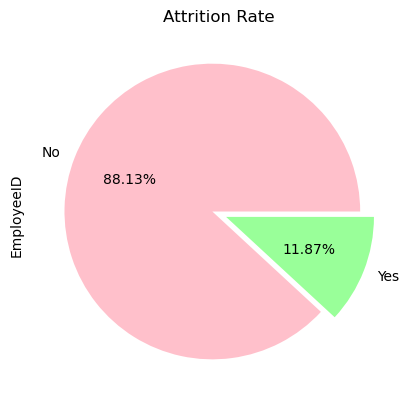

In [26]:
# Pie chart for total attrition
yes=attrition_data.groupby(["Attrition"]).count()["EmployeeID"]
colors= "pink", "#99ff99"
explode= .05, .05
graph=yes.plot(kind="pie", title= "Attrition Rate", autopct="%1.2f%%", colors=colors, explode= explode)

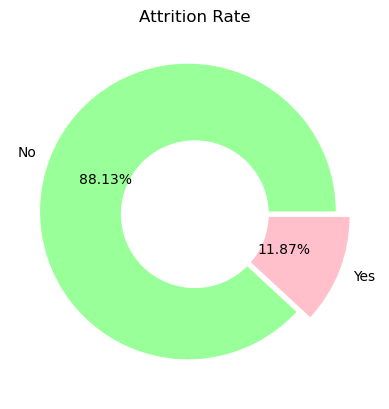

In [27]:
# Donut chart for total attrition
colors=  "#99ff99" , "pink"
explode= .05, .05
autopct="%1.2f%%"
labels= ["No", "Yes"]
plt.pie(yes,colors=colors,explode=explode, autopct=autopct,labels=labels)
plt.title ("Attrition Rate")
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf() 
fig.gca().add_artist(centre_circle)

In [28]:
# Attrition by Tenure
# copy of df
tenureDataDF = attrition_data.copy()

In [29]:
# Yes attrition values
tenureDF1 =  tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] <= 0)]
tenureResults1=  tenureDF1[(tenureDF1["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults1

18

In [30]:
tenureDF2 =  tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >0) & (tenureDataDF["YearsAtCompany"] <=1)]
tenureResults2=  tenureDF2[(tenureDF2["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults2

59

In [31]:
tenureDF3 =  tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >1) & (tenureDataDF["YearsAtCompany"] <=2)]
tenureResults3=  tenureDF3[(tenureDF3["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults3

30

In [32]:
tenureDF4 =  tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >2) & (tenureDataDF["YearsAtCompany"] <=3)]
tenureResults4= tenureDF4[(tenureDF4["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults4

17

In [33]:
tenureDF5 =  tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >3) & (tenureDataDF["YearsAtCompany"] <=4)]
tenureResults5= tenureDF5[(tenureDF5["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults5

14

In [34]:
tenureDF6 =  tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >4) & (tenureDataDF["YearsAtCompany"] <=5)]
tenureResults6= tenureDF6[(tenureDF6["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults6

19

In [35]:
tenureDF7 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >5) & (tenureDataDF["YearsAtCompany"] <=6)]
tenureResults7= tenureDF7[(tenureDF7["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults7

5

In [36]:
tenureDF8 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >6) & (tenureDataDF["YearsAtCompany"] <=7)]
tenureResults8= tenureDF8[(tenureDF8["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults8

10

In [37]:
tenureDF9 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >7) & (tenureDataDF["YearsAtCompany"] <=8)]
tenureResults9= tenureDF9[(tenureDF9["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults9

6

In [38]:
tenureDF10 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >8) & (tenureDataDF["YearsAtCompany"] <=9)]
tenureResults10= tenureDF10[(tenureDF10["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults10

3

In [39]:
tenureDF11 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >9) & (tenureDataDF["YearsAtCompany"] <=10)]
tenureResults11= tenureDF11[(tenureDF11["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults11

11

In [40]:
tenureDF12 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >10) & (tenureDataDF["YearsAtCompany"] <=11)]
tenureResults12= tenureDF12[(tenureDF12["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults12

1

In [41]:
tenureDF13 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >12) & (tenureDataDF["YearsAtCompany"] <=14)]
tenureResults13= tenureDF13[(tenureDF13["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults13

1

In [42]:
tenureDF14 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >14) & (tenureDataDF["YearsAtCompany"] <=15)]
tenureResults14= tenureDF14[(tenureDF14["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults14

2

In [43]:
tenureDF15 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >15) & (tenureDataDF["YearsAtCompany"] <=19)]
tenureResults15= tenureDF15[(tenureDF15["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults15

1

In [44]:
tenureDF16 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >19) & (tenureDataDF["YearsAtCompany"] <=23)]
tenureResults16= tenureDF16[(tenureDF16["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults16

1

In [45]:
tenureDF17 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >23) & (tenureDataDF["YearsAtCompany"] <=31)]
tenureResults17= tenureDF17[(tenureDF17["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults17

1

Dataframe for number of employees who left after x number of years working

In [46]:
attritionDF = pd.DataFrame({"0 Years at company": [tenureResults1],
                           "1 Years at company": [tenureResults2],
                            "2 Years at company": [tenureResults3],
                            "3 Years at company": [tenureResults4],
                            "4 Years at company": [tenureResults5],
                            "5 Years at company": [tenureResults6],
                            "6 Years at company": [tenureResults7],
                            "7 Years at company": [tenureResults8],
                            "8 Years at company": [tenureResults9],
                            "9 Years at company": [tenureResults10],
                            "10 Years at company": [tenureResults11],
                            "11 Years at company": [tenureResults12],
                            "14 Years at company": [tenureResults13],
                            "15 Years at company": [tenureResults14],
                            "19 Years at company": [tenureResults15],
                            "23 Years at company": [tenureResults16],
                            "31 Years at company": [tenureResults17]
                           })
attritionDF

,0 Years at company,1 Years at company,2 Years at company,3 Years at company,4 Years at company,5 Years at company,6 Years at company,7 Years at company,8 Years at company,9 Years at company,10 Years at company,11 Years at company,14 Years at company,15 Years at company,19 Years at company,23 Years at company,31 Years at company
0,18,59,30,17,14,19,5,10,6,3,11,1,1,2,1,1,1


<BarContainer object of 4 artists>

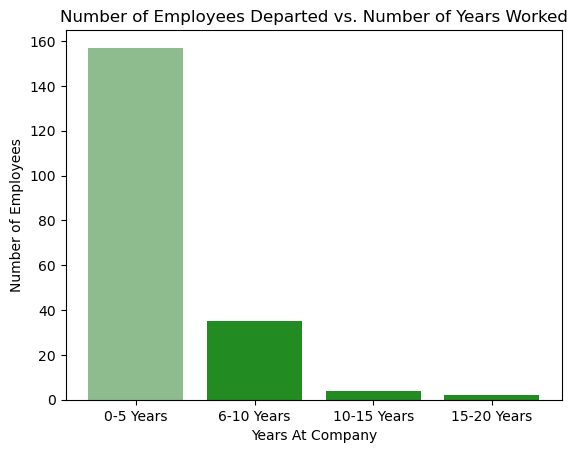

In [47]:
employees=[157,35,4,2]
xAxisPoints=np.arange(len(employees))
ticks3= [x for x in xAxisPoints]
plt.xticks(ticks3,["0-5 Years","6-10 Years", "10-15 Years", "15-20 Years"])
plt.xlabel("Years At Company")
plt.ylabel("Number of Employees")
plt.title("Number of Employees Departed vs. Number of Years Worked")
plt.bar(xAxisPoints, employees, align="center", color= ["darkseagreen","forestgreen","forestgreen","forestgreen"])

<BarContainer object of 6 artists>

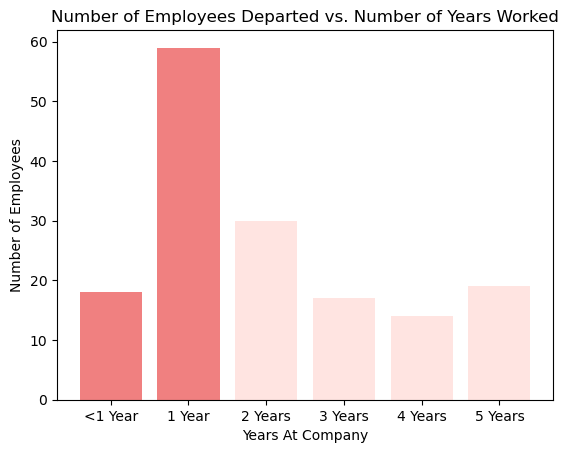

In [48]:
employees3=[18,59,30,17,14,19]
xAxisPoints3=np.arange(len(employees3))
ticks3= [x for x in xAxisPoints3]

plt.xticks(ticks3,["<1 Year", "1 Year", "2 Years", "3 Years", "4 Years", "5 Years"])
plt.xlabel("Years At Company")
plt.ylabel("Number of Employees")
plt.title("Number of Employees Departed vs. Number of Years Worked")
plt.bar(xAxisPoints3, employees3, align="center", color=["lightcoral","lightcoral","mistyrose","mistyrose","mistyrose","mistyrose"])

Percentage of employees who left after first year

In [53]:
tenureAnalysis=tenureDataDF[(tenureDataDF["YearsAtCompany"] <= 1)].count()["EmployeeID"]
tenureAnalysis
# how many employees there were in 0-1 years

241

In [50]:
tenureAnalysis1 =  tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >0) & (tenureDataDF["YearsAtCompany"] <=1)]
tenureAnalysis2=  tenureAnalysis1[(tenureAnalysis1["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureAnalysis2
#how many employees left in 0-1 years

59

In [51]:
firstYear=tenureAnalysis2 / float(tenureAnalysis) * 100
firstYear
#percentage of those who left 0-1 years

24.481327800829874

No attrition data

In [52]:
tenureDF18 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] <= 0)]
tenureResults18=  tenureDF18[(tenureDF18["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults18

28

In [54]:
tenureDF19 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >0) & (tenureDataDF["YearsAtCompany"] <=1)]
tenureResults19=  tenureDF19[(tenureDF19["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults19

136

In [55]:
tenureDF20 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >1) & (tenureDataDF["YearsAtCompany"] <=2)]
tenureResults20=  tenureDF20[(tenureDF20["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults20

116

In [56]:
tenureDF21 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >2) & (tenureDataDF["YearsAtCompany"] <=3)]
tenureResults21=  tenureDF21[(tenureDF21["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults21

135

In [57]:
tenureDF22 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >3) & (tenureDataDF["YearsAtCompany"] <=4)]
tenureResults22=  tenureDF22[(tenureDF22["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults22

106

In [58]:
tenureDF23 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >4) & (tenureDataDF["YearsAtCompany"] <=5)]
tenureResults23=  tenureDF23[(tenureDF23["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults23

200

In [59]:
tenureDF24 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >5) & (tenureDataDF["YearsAtCompany"] <=6)]
tenureResults24=  tenureDF24[(tenureDF24["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults24

81

In [60]:
tenureDF25 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >6) & (tenureDataDF["YearsAtCompany"] <=7)]
tenureResults25=  tenureDF25[(tenureDF25["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults25

94

In [61]:
tenureDF26 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >7) & (tenureDataDF["YearsAtCompany"] <=8)]
tenureResults26=  tenureDF26[(tenureDF26["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults26

87

In [62]:
tenureDF27 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >8) & (tenureDataDF["YearsAtCompany"] <=9)]
tenureResults27=  tenureDF27[(tenureDF27["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults27

91

In [63]:
tenureDF28 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >9) & (tenureDataDF["YearsAtCompany"] <=10)]
tenureResults28=  tenureDF28[(tenureDF28["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults28

126

In [64]:
tenureDF29 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >10) & (tenureDataDF["YearsAtCompany"] <=11)]
tenureResults29=  tenureDF29[(tenureDF29["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults29

36

In [65]:
tenureDF30 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >11) & (tenureDataDF["YearsAtCompany"] <=12)]
tenureResults30=  tenureDF30[(tenureDF30["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults30

17

In [66]:
tenureDF31 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >12) & (tenureDataDF["YearsAtCompany"] <=13)]
tenureResults31=  tenureDF31[(tenureDF31["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults31

28

In [67]:
tenureDF32 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >13) & (tenureDataDF["YearsAtCompany"] <=14)]
tenureResults32=  tenureDF32[(tenureDF32["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults32

19

In [68]:
tenureDF33 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >14) & (tenureDataDF["YearsAtCompany"] <=15)]
tenureResults33=  tenureDF33[(tenureDF33["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults33

21

In [69]:
tenureDF34 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >15) & (tenureDataDF["YearsAtCompany"] <=16)]
tenureResults34=  tenureDF34[(tenureDF34["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults34

12

In [70]:
tenureDF35 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >16) & (tenureDataDF["YearsAtCompany"] <=17)]
tenureResults35=  tenureDF35[(tenureDF35["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults35

12

In [71]:
tenureDF36 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >17) & (tenureDataDF["YearsAtCompany"] <=18)]
tenureResults36=  tenureDF36[(tenureDF36["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults36

13

In [72]:
tenureDF37 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >18) & (tenureDataDF["YearsAtCompany"] <=19)]
tenureResults37=  tenureDF37[(tenureDF37["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults37

13

In [73]:
tenureDF38=  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >19) & (tenureDataDF["YearsAtCompany"] <=20)]
tenureResults38=  tenureDF38[(tenureDF38["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults38

32

In [74]:
tenureDF39 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >20) & (tenureDataDF["YearsAtCompany"] <=21)]
tenureResults39=  tenureDF39[(tenureDF39["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults39

17

In [75]:
tenureDF40 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >21) & (tenureDataDF["YearsAtCompany"] <=22)]
tenureResults40=  tenureDF40[(tenureDF40["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults40

19

In [76]:
tenureDF41 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >22) & (tenureDataDF["YearsAtCompany"] <=23)]
tenureResults41=  tenureDF41[(tenureDF41["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults41

1

Dataframe for number of employees who stayed after x number of years working

In [77]:
attritionDF = pd.DataFrame({"0 Years at company": [tenureResults18],
                           "1 Years at company": [tenureResults19],
                            "2 Years at company": [tenureResults20],
                            "3 Years at company": [tenureResults21],
                            "4 Years at company": [tenureResults22],
                            "5 Years at company": [tenureResults23],
                            "6 Years at company": [tenureResults24],
                            "7 Years at company": [tenureResults25],
                            "8 Years at company": [tenureResults26],
                            "9 Years at company": [tenureResults27],
                            "10 Years at company": [tenureResults28],
                            "11 Years at company": [tenureResults29],
                            "12 Years at company": [tenureResults30],
                            "13 Years at company": [tenureResults31],
                            "14 Years at company": [tenureResults32],
                            "15 Years at company": [tenureResults33],
                            "16 Years at company": [tenureResults34],
                            "17 Years at company": [tenureResults35],
                            "18 Years at company": [tenureResults36],
                            "19 Years at company": [tenureResults37],
                            "20 Years at company": [tenureResults38],
                            "21 Years at company": [tenureResults39],
                            "22 Years at company": [tenureResults40],
                            "23 Years at company": [tenureResults41]
                        
                            
                           })
attritionDF

,0 Years at company,1 Years at company,2 Years at company,3 Years at company,4 Years at company,5 Years at company,6 Years at company,7 Years at company,8 Years at company,9 Years at company,...,14 Years at company,15 Years at company,16 Years at company,17 Years at company,18 Years at company,19 Years at company,20 Years at company,21 Years at company,22 Years at company,23 Years at company
0,28,136,116,135,106,200,81,94,87,91,...,19,21,12,12,13,13,32,17,19,1


<BarContainer object of 4 artists>

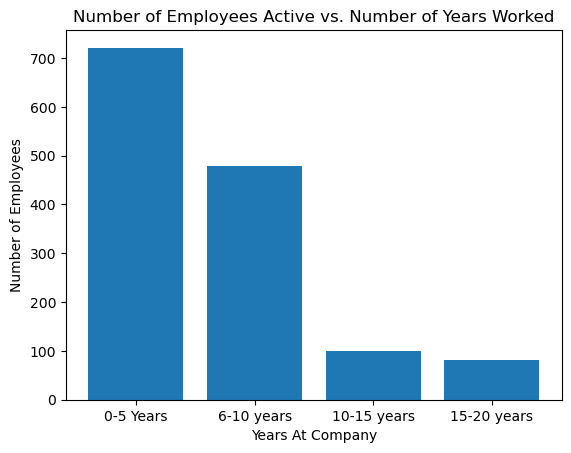

In [78]:
employees2=[721,479,100,82]
xAxisPoints2=np.arange(len(employees2))
ticks1= [x for x in xAxisPoints]
plt.xticks(ticks1,["0-5 Years","6-10 years", "10-15 years", "15-20 years"])
plt.xlabel("Years At Company")
plt.ylabel("Number of Employees")
plt.title("Number of Employees Active vs. Number of Years Worked")
plt.bar(xAxisPoints2, employees2, align="center")

<BarContainer object of 6 artists>

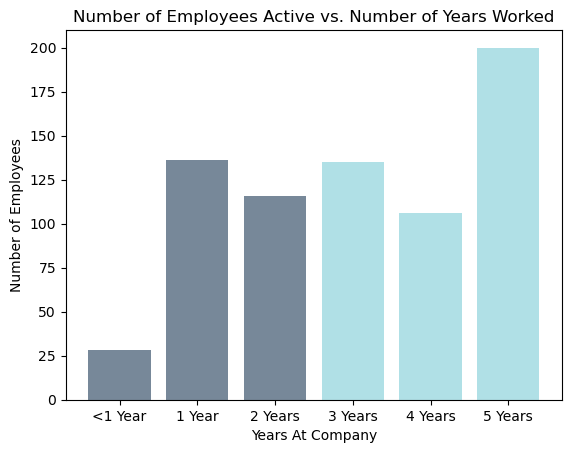

In [79]:
employees4=[28,136,116,135,106,200]
xAxisPoints4=np.arange(len(employees4))
ticks4= [x for x in xAxisPoints4]
plt.xticks(ticks3,["<1 Year", "1 Year", "2 Years", "3 Years", "4 Years", "5 Years"])
plt.xlabel("Years At Company")
plt.ylabel("Number of Employees")
plt.title("Number of Employees Active vs. Number of Years Worked")
plt.bar(xAxisPoints4, employees4, align="center", color=["lightslategray","lightslategray","lightslategray","powderblue","powderblue","powderblue"])

Percentage of those who stayed in "3 Years At Company"

In [80]:
tenureAnalysis3=tenureDataDF[(tenureDataDF["YearsAtCompany"] > 2) & (tenureDataDF ["YearsAtCompany"] <=3)]
year3Total=len(tenureAnalysis3)
year3Total
# how many employees there were in 3 years at company 

152

In [81]:
tenureAnalysis4 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >2) & (tenureDataDF["YearsAtCompany"] <=3)]
tenureAnalysis5=  tenureAnalysis4[(tenureAnalysis4["Attrition"] == "No")].count()["YearsAtCompany"]
tenureAnalysis5
# how many people stayed in "3 years at company"

135

In [82]:
year3= float(tenureAnalysis5) / year3Total * 100
year3
#percentage of those who stayed in "3 years at company"

88.81578947368422

Percentage of those who stayed in "4 Years At Company"

In [84]:
tenureAnalysis6=tenureDataDF[(tenureDataDF["YearsAtCompany"] > 3) & (tenureDataDF ["YearsAtCompany"] <=4)]
year4Total=len(tenureAnalysis6)
year4Total

120

In [85]:
tenureAnalysis7 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >3) & (tenureDataDF["YearsAtCompany"] <=4)]
tenureAnalysis8=  tenureAnalysis7[(tenureAnalysis7["Attrition"] == "No")].count()["YearsAtCompany"]
tenureAnalysis8

106

In [86]:
year4= float(tenureAnalysis8) / year4Total * 100
year4

88.33333333333333

Percentage of those who stayed in "5 Years At Company"

In [87]:
tenureAnalysis9=tenureDataDF[(tenureDataDF["YearsAtCompany"] > 4) & (tenureDataDF ["YearsAtCompany"] <=5)]
year5Total=len(tenureAnalysis9)
year5Total

219

In [88]:
tenureAnalysis10 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >4) & (tenureDataDF["YearsAtCompany"] <=5)]
tenureAnalysis11=  tenureAnalysis10[(tenureAnalysis10["Attrition"] == "No")].count()["YearsAtCompany"]
tenureAnalysis11

200

In [89]:
year5= float(tenureAnalysis11) / year5Total * 100
year5

91.32420091324201

<BarContainer object of 3 artists>

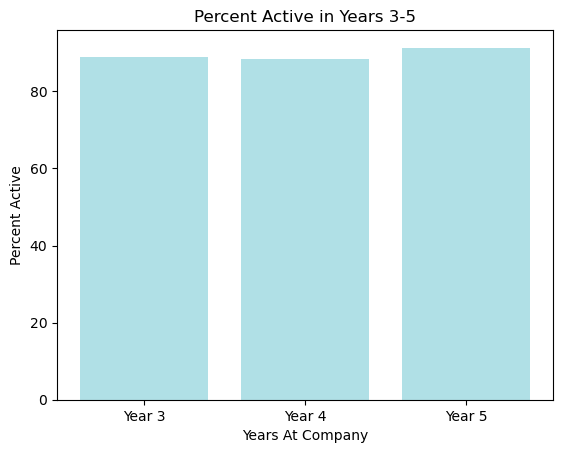

In [90]:
employees5=[year3, year4, year5]
xAxisPoints5=np.arange(len(employees5))
ticks5= [x for x in xAxisPoints5]
plt.xticks(ticks5,["Year 3", "Year 4", "Year 5"])
plt.xlabel("Years At Company")
plt.ylabel("Percent Active")
plt.title("Percent Active in Years 3-5")
plt.bar(xAxisPoints5, employees5, align="center", color=["powderblue","powderblue","powderblue"])

## Traveling Nurses vs Non-Traveling
How does overtime play into RN attrition? Patterns of gender and marital roles; any pay differences?

In [91]:
TravelN_vs_Instate = attrition_data.copy()[['Gender','MaritalStatus','BusinessTravel','DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'StandardHours', 'OverTime', 'PercentSalaryHike']]

TravelN_vs_Instate.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
0,Female,Single,Travel_Rarely,1,94,5993,80,Yes,11
1,Male,Married,Travel_Frequently,8,61,5130,80,No,23
2,Male,Single,Travel_Rarely,2,92,2090,80,Yes,15
3,Female,Married,Travel_Frequently,3,56,2909,80,Yes,11
4,Male,Married,Travel_Rarely,2,40,3468,80,No,12


## GENDER FACTOR BAR PLOTS

In [92]:
#Clean Up Male data
MaleData = TravelN_vs_Instate.loc[TravelN_vs_Instate["Gender"] == "Male", :]
MaleData.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
1,Male,Married,Travel_Frequently,8,61,5130,80,No,23
2,Male,Single,Travel_Rarely,2,92,2090,80,Yes,15
4,Male,Married,Travel_Rarely,2,40,3468,80,No,12
5,Male,Single,Travel_Frequently,2,79,3068,80,No,13
7,Male,Divorced,Travel_Rarely,24,67,2693,80,No,22


In [93]:
#MALE NURSES NOT ON OVERTIME MONTHLY INCOME BY TRAVEL 

maleOVNn=MaleData.loc[MaleData["OverTime"]=="No",:]
maleOVNn.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
1,Male,Married,Travel_Frequently,8,61,5130,80,No,23
4,Male,Married,Travel_Rarely,2,40,3468,80,No,12
5,Male,Single,Travel_Frequently,2,79,3068,80,No,13
7,Male,Divorced,Travel_Rarely,24,67,2693,80,No,22
8,Male,Single,Travel_Frequently,23,44,9526,80,No,21


In [94]:
MOVN_AGG = maleOVNn.groupby(['BusinessTravel'])[['MonthlyIncome']].agg(['mean', 'median', 'var', 'std',])
MOVN_AGG

MonthlyIncome                                   
                           mean  median           var          std
BusinessTravel                                                    
Non-Travel          5770.418367  4365.0  1.936295e+07  4400.334776
Travel_Frequently   6114.270492  4729.5  1.849916e+07  4301.064537
Travel_Rarely       6508.664706  4773.0  2.444425e+07  4944.112447

In [95]:
#MALE NURSES ON OVERTIME
maleOVYy=MaleData.loc[MaleData["OverTime"]=="Yes",:]
maleOVYy.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
2,Male,Single,Travel_Rarely,2,92,2090,80,Yes,15
14,Male,Single,Travel_Rarely,24,50,2028,80,Yes,14
16,Male,Divorced,Travel_Rarely,5,80,3298,80,Yes,12
17,Male,Divorced,Non-Travel,16,96,2935,80,Yes,13
19,Male,Single,Travel_Rarely,2,45,3944,80,Yes,11


In [96]:
MOVY_AGG = maleOVYy.groupby(['BusinessTravel'])[['MonthlyIncome']].agg(['mean', 'median', 'var', 'std',])
MOVY_AGG

MonthlyIncome                                   
                           mean  median           var          std
BusinessTravel                                                    
Non-Travel          7374.190476  6349.0  2.450012e+07  4949.759768
Travel_Frequently   6323.750000  4998.5  2.268592e+07  4762.974326
Travel_Rarely       6481.187166  5207.0  2.194008e+07  4684.024164

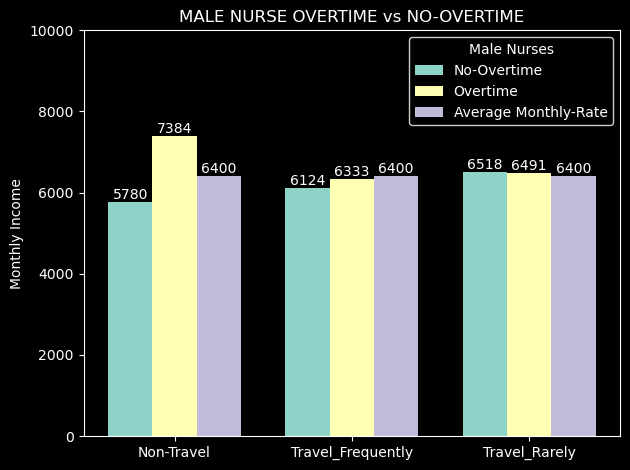

In [98]:
plt.style.use('dark_background')
maletravel = ("Non-Travel", "Travel_Frequently", "Travel_Rarely")
monthlyincome = {
    'No-Overtime': (5770, 6114, 6508),
    'Overtime': (7374, 6323,6481),
    'Average Monthly-Rate': (6390, 6390,6390),
}
x = np.arange(len(maletravel))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
ncolors = len(plt.rcParams['axes.prop_cycle'])
fig, ax = plt.subplots(layout='tight')

for attribute, measurement in monthlyincome.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width,ncolors, label=attribute)
    ax.bar_label(rects,label_type='edge')
    multiplier += 1
   

ax.set_ylabel('Monthly Income')
ax.set_title('MALE NURSE OVERTIME vs NO-OVERTIME',fontsize=12)
ax.set_xticks(x + width, maletravel)
plt.legend(
          title="Male Nurses",
          loc="upper right",
          shadow=True,
)
ax.set_ylim(0, 10000)

plt.show()


In [99]:
#AVEREAGE MONTHLY INCLOME OF MALE NURSES
count_maleAV=round(MaleData["MonthlyIncome"].mean())
print(f"Male Nurses get payed on average ${count_maleAV}")

Male Nurses get payed on average $6390


In [100]:
#NUMBER OF MALES
count_male=MaleData['Gender']=="Male"
print(f"Total Male Nurses: {count_male.sum()} ")

#NUMBER OF MALES on OverTime
maleOVY=MaleData['OverTime']=="Yes"
print(f"Total Male Nurses on Overtime: {maleOVY.sum()}" )

#NUMBER OF MALES NOT on OverTime
maleOVN=MaleData['OverTime']=="No"
print(f"Total Male Nurses NOT on Overtime: {maleOVN.sum()} " )

count_maleM=MaleData['MaritalStatus']=="Married"
print(f"Total Male Nurses that are married: {count_maleM.sum()} ")

count_maleS=MaleData['MaritalStatus']=="Single"
print(f"Total Male Nurses that are single: {count_maleS.sum()} ")

count_maleD=MaleData['MaritalStatus']=="Divorced"
print(f"Total Male Nurses that are divorsed: {count_maleD.sum()} ")

Total Male Nurses: 998 
Total Male Nurses on Overtime: 268
Total Male Nurses NOT on Overtime: 730 
Total Male Nurses that are married: 464 
Total Male Nurses that are single: 297 
Total Male Nurses that are divorsed: 237 


In [101]:
#AVEREAGE MONTHLY INCLOME OF MALE NURSES
count_maleAV=round(MaleData["MonthlyIncome"].mean())
print(f"Male Nurses get payed on average ${count_maleAV}")

Male Nurses get payed on average $6390


In [102]:
#Clean Up Female data
FemaleData = TravelN_vs_Instate.loc[TravelN_vs_Instate["Gender"] == "Female", :]
FemaleData.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
0,Female,Single,Travel_Rarely,1,94,5993,80,Yes,11
3,Female,Married,Travel_Frequently,3,56,2909,80,Yes,11
6,Female,Married,Travel_Rarely,3,81,2670,80,Yes,20
11,Female,Single,Travel_Rarely,15,49,4193,80,Yes,12
15,Female,Divorced,Travel_Rarely,21,51,9980,80,No,11


In [103]:
#FEMALE NURSES NOT ON OVERTIME MONTHLY INCOME BY TRAVEL 

femaleOVNn=FemaleData.loc[FemaleData["OverTime"]=="No",:]
femaleOVNn.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
15,Female,Divorced,Travel_Rarely,21,51,9980,80,No,11
18,Female,Married,Travel_Rarely,2,78,15427,80,No,16
20,Female,Divorced,Non-Travel,11,96,4011,80,No,18
22,Female,Single,Travel_Rarely,7,53,11994,80,No,11
25,Female,Divorced,Travel_Rarely,5,58,19094,80,No,11


In [104]:
FOVN_AGG = femaleOVNn.groupby(['BusinessTravel'])[['MonthlyIncome']].agg(['mean', 'median', 'var', 'std'])
FOVN_AGG

MonthlyIncome                                   
                           mean  median           var          std
BusinessTravel                                                    
Non-Travel          6222.297297  5265.0  1.698488e+07  4121.271135
Travel_Frequently   5889.000000  4639.0  1.464067e+07  3826.312825
Travel_Rarely       6981.629851  5324.0  2.442790e+07  4942.458862

In [105]:
#FEMALE NURSES ON OVERTIME MONTHLY INCOME BY TRAVEL 

femaleOVYy=FemaleData.loc[FemaleData["OverTime"]=="Yes",:]
femaleOVYy.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
0,Female,Single,Travel_Rarely,1,94,5993,80,Yes,11
3,Female,Married,Travel_Frequently,3,56,2909,80,Yes,11
6,Female,Married,Travel_Rarely,3,81,2670,80,Yes,20
11,Female,Single,Travel_Rarely,15,49,4193,80,Yes,12
26,Female,Single,Travel_Frequently,16,72,3919,80,Yes,22


In [106]:
FOVY_AGG = femaleOVYy.groupby(['BusinessTravel'])[['MonthlyIncome']].agg(['mean', 'median', 'var', 'std',])
FOVY_AGG

MonthlyIncome                                   
                           mean  median           var          std
BusinessTravel                                                    
Non-Travel          7668.250000  5517.0  2.106841e+07  4590.034241
Travel_Frequently   6245.625000  4170.5  2.658373e+07  5155.941212
Travel_Rarely       6748.940789  5206.5  2.119154e+07  4603.427428

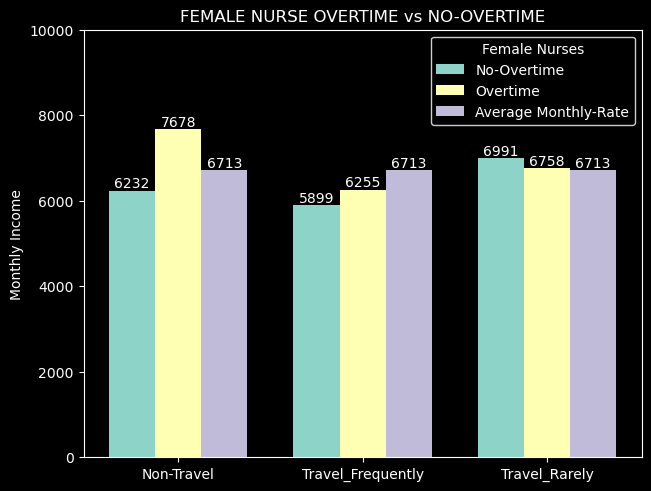

In [108]:
plt.style.use('dark_background')

colors = ["#ffffcc", "#a1dab4", "#41b6c4"]
femaletravel = ("Non-Travel", "Travel_Frequently", "Travel_Rarely")
monthlyincome = {
    'No-Overtime': (6222, 5889, 6981),
    'Overtime': (7668, 6245,6748),
    'Average Monthly-Rate': (6703, 6703,6703),
}
x = np.arange(len(femaletravel))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
colors = ["#ffffcc", "#a1dab4", "#41b6c4"]
ncolors = len(plt.rcParams['axes.prop_cycle'])
fig, ax = plt.subplots(layout='constrained')


for attribute, measurement in monthlyincome.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width,ncolors, label=attribute)
    ax.bar_label(rects, label_type='edge')
    multiplier += 1
   
ax.set_ylabel('Monthly Income')
ax.set_title('FEMALE NURSE OVERTIME vs NO-OVERTIME',fontsize=12)
ax.set_xticks(x + width, femaletravel)
plt.legend(
          title="Female Nurses",
          loc="upper right",
          shadow=True,
)
ax.set_ylim(0, 10000)

plt.show()

In [109]:
#NUMBER OF FEMALES
count_female=FemaleData['Gender']=="Female"
print(f"Total Female Nurses: {count_female.sum()} ")

#NUMBER OF FEMALES on overtime
femaleOVY=FemaleData['OverTime']=="Yes"
print(f"Total Female Nurses on Overtime: {femaleOVY.sum()}" )

femaleOVN=FemaleData['OverTime']=="No"
print(f"Total Female Nurses NOT on Overtime: {femaleOVN.sum()} " )

count_femaleM=FemaleData['MaritalStatus']=="Married"
print(f"Total Female Nurses that are married: {count_femaleM.sum()} ")

count_femaleS=FemaleData['MaritalStatus']=="Single"
print(f"Total Female Nurses that are single: {count_femaleS.sum()} ")

count_femaleD=FemaleData['MaritalStatus']=="Divorced"
print(f"Total Female Nurses that are divorsed: {count_femaleD.sum()} ")

Total Female Nurses: 678 
Total Female Nurses on Overtime: 208
Total Female Nurses NOT on Overtime: 470 
Total Female Nurses that are married: 313 
Total Female Nurses that are single: 225 
Total Female Nurses that are divorsed: 140 


In [110]:
#AVEREAGE MONTHLY INCOME OF FEMALE NURSES 
count_femaleAV=round(FemaleData["MonthlyIncome"].mean())
print(f"Female Nurses get payed on average ${count_femaleAV}")

Female Nurses get payed on average $6703


## TRAVELERS vs NON-TRAVELERS FACTOR

In [111]:
#Clean Up non-travel data
NonTData = TravelN_vs_Instate.loc[TravelN_vs_Instate["BusinessTravel"] == "Non-Travel", :]
NonTData.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
17,Male,Divorced,Non-Travel,16,96,2935,80,Yes,13
20,Female,Divorced,Non-Travel,11,96,4011,80,No,18
46,Male,Single,Non-Travel,23,72,4568,80,No,20
53,Male,Married,Non-Travel,11,79,9884,80,Yes,13
83,Female,Divorced,Non-Travel,6,79,5329,80,Yes,12


In [112]:
#NUMBER OF NONE TRAVELERS
count_nontravel=NonTData['BusinessTravel']=="Non-Travel"
print(f"There are {count_nontravel.sum()} Nurses who don't travel for work.")

count_nontravelAVG=round(NonTData["MonthlyIncome"].mean())
print(f"Non-traveling Nurses get payed a monthly average of ${count_nontravelAVG}")

HRnontravel=round(NonTData["HourlyRate"].mean())
print(f"Non-traveling Nurse's hourly rate ${HRnontravel}")

nontravelOVY=NonTData['OverTime']=="Yes"
print(f"Total Nurses on Overtime: {nontravelOVY.sum()}" )

nontravelOVN=NonTData['OverTime']=="No"
print(f"Total Nurses NOT on Overtime: {nontravelOVN.sum()} " )

There are 172 Nurses who don't travel for work.
Non-traveling Nurses get payed a monthly average of $6240
Non-traveling Nurse's hourly rate $64
Total Nurses on Overtime: 37
Total Nurses NOT on Overtime: 135 


In [113]:
#Clean Up rare-travel data
RareData = TravelN_vs_Instate.loc[TravelN_vs_Instate["BusinessTravel"] == "Travel_Rarely", :]
RareData.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
0,Female,Single,Travel_Rarely,1,94,5993,80,Yes,11
2,Male,Single,Travel_Rarely,2,92,2090,80,Yes,15
4,Male,Married,Travel_Rarely,2,40,3468,80,No,12
6,Female,Married,Travel_Rarely,3,81,2670,80,Yes,20
7,Male,Divorced,Travel_Rarely,24,67,2693,80,No,22


In [114]:
#NUMBER OF RARE TRAVELERS
count_raretravel=RareData['BusinessTravel']=="Travel_Rarely"
print(f"There are {count_raretravel.sum()} Nurses who rarely travel for work.")

count_raretravelAVG=round(RareData["MonthlyIncome"].mean())
print(f"Rarely traveling Nurses get payed a monthly average of ${count_raretravelAVG}")

HRraretravel=round(RareData["HourlyRate"].mean())
print(f"Rarely traveling Nurse's hourly rate ${HRraretravel}")

raretravelOVY=RareData['OverTime']=="Yes"
print(f"Total Nurses on Overtime: {raretravelOVY.sum()}" )

raretravelOVN=RareData['OverTime']=="No"
print(f"Total Nurses NOT on Overtime: {raretravelOVN.sum()} " )

There are 1184 Nurses who rarely travel for work.
Rarely traveling Nurses get payed a monthly average of $6669
Rarely traveling Nurse's hourly rate $66
Total Nurses on Overtime: 339
Total Nurses NOT on Overtime: 845 


In [115]:
#Clean Up Travel_Frequently
TRFData = TravelN_vs_Instate.loc[TravelN_vs_Instate["BusinessTravel"] == "Travel_Frequently", :]
TRFData.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
1,Male,Married,Travel_Frequently,8,61,5130,80,No,23
3,Female,Married,Travel_Frequently,3,56,2909,80,Yes,11
5,Male,Single,Travel_Frequently,2,79,3068,80,No,13
8,Male,Single,Travel_Frequently,23,44,9526,80,No,21
26,Female,Single,Travel_Frequently,16,72,3919,80,Yes,22


In [116]:
#NUMBER OF FREQUENT TRAVELERS
count_fretravel=TRFData['BusinessTravel']=="Travel_Frequently"
print(f"There are {count_fretravel.sum()} Nurses who travel frequently for work.")

count_fretravelAVG=round(TRFData["MonthlyIncome"].mean())
print(f"Frequently traveling Nurses get payed a monthly average of ${count_fretravelAVG}")

HRfretravel=round(TRFData["HourlyRate"].mean())
print(f"Frequently traveling Nurse's hourly rate ${HRfretravel}")

fretravelOVY=TRFData['OverTime']=="Yes"
print(f"Total Nurses on Overtime: {fretravelOVY.sum()}" )

fretravelOVN=TRFData['OverTime']=="No"
print(f"Total Nurses NOT on Overtime: {fretravelOVN.sum()} " )

There are 320 Nurses who travel frequently for work.
Frequently traveling Nurses get payed a monthly average of $6101
Frequently traveling Nurse's hourly rate $65
Total Nurses on Overtime: 100
Total Nurses NOT on Overtime: 220 


# Travelers vs Non-Travelers Pie Chart

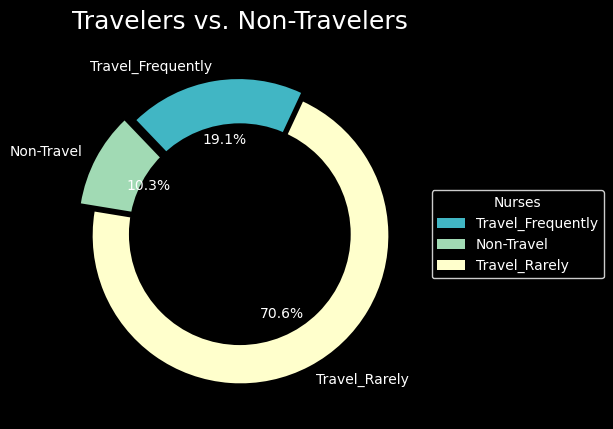

In [117]:
plt.style.use('dark_background')
labels = ['Travel_Frequently','Non-Travel', 'Travel_Rarely']
share = [320,172,1184,] 
explode = (0.05, .1, .01)  
colors = ["#41b6c4","#a1dab4","#ffffcc","#a1dab4", "#253494","#2c7fb8"]
#font_color = '#525252'
#plt.style.use('ggplot')
plt.title('Travelers vs. Non-Travelers',fontsize=18, pad=15, )
plt.pie(x=share, labels=labels,colors=colors,explode=explode, shadow=False, autopct='%1.1f%%',
         startangle=65)
plt.legend(
          title="Nurses",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          shadow=True)
# donut
circle = plt.Circle(xy=(0,0), radius=.75, facecolor='black')
plt.gca().add_artist(circle)
plt.show()